In [2]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_gray = cv2.imread('cat1.jpg',0)
cv2.imshow('cat', img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [5]:
print (img_gray.dtype)

uint8


In [6]:
print (img_gray.shape)

(124, 143)


In [3]:

img = cv2.imread('cat1.jpg')
cv2.imshow('cat', img)
key = cv2.waitKey()

if key == 27:
    cv2.destroyAllWindows()
    
print (img.shape)

(124, 143, 3)


In [9]:
#color split
B,G,R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()

if key == 27:
    cv2.destroyAllWindows()

In [7]:
lista = []
for i in range(50):
    b_rand = random.randint(-50, 50)
    lista.append(b_rand)
print(lista)

[-26, -50, -34, 14, 35, 42, -31, -46, 42, 42, -30, -43, 16, -13, -7, 4, -12, -4, -18, 46, -40, -46, -37, -47, 49, 50, 35, 22, -10, 47, 37, 14, 14, -18, 33, 37, 44, -46, -41, -18, 21, -26, -2, -27, 37, -49, -15, 47, 36, 4]


In [4]:
def random_light_color(img):
    B, G, R = cv2.split(img)
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
        
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    
    img_merge = cv2.merge((B, G, R))
    return img_merge

In [5]:
img_recolor = random_light_color(img)
cv2.imshow('recolor', img_recolor)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    

In [2]:
# log correction 

img_dark = cv2.imread('heian.png')
cv2.imshow('image_dark',img_dark)
#为了保证快速，建立一个table list存储每个像素值的结果   

def adjust_log(image, dc = 43):
    table = []
    lim = 255
    for i in range(0,256):
        temp = dc * np.log(i + 1)
        table.append(temp)
    
    table = np.array(table)
    table[table > lim] = 255
    table = table.astype('uint8')
    print (table)
    return cv2.LUT(img_dark, table)

img_bright = adjust_log(img_dark)
cv2.imshow('image_bright', img_bright)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[  0  29  47  59  69  77  83  89  94  99 103 106 110 113 116 119 121 124
 126 128 130 132 134 136 138 140 141 143 144 146 147 149 150 151 152 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 169 170 171
 172 173 173 174 175 176 176 177 178 178 179 180 180 181 182 182 183 183
 184 185 185 186 186 187 187 188 188 189 190 190 191 191 192 192 193 193
 193 194 194 195 195 196 196 197 197 198 198 198 199 199 200 200 200 201
 201 202 202 202 203 203 204 204 204 205 205 205 206 206 206 207 207 207
 208 208 208 209 209 209 210 210 210 211 211 211 212 212 212 213 213 213
 213 214 214 214 215 215 215 216 216 216 216 217 217 217 217 218 218 218
 219 219 219 219 220 220 220 220 221 221 221 221 222 222 222 222 223 223
 223 223 224 224 224 224 224 225 225 225 225 226 226 226 226 226 227 227
 227 227 228 228 228 228 228 229 229 229 229 229 230 230 230 230 230 231
 231 231 231 231 232 232 232 232 232 233 233 233 233 233 234 234 234 234
 234 234 235 235 235 235 235 236 236 236 236 236 23

In [3]:
# gamma correction 

img_dark = cv2.imread('shiguanzhang.png')
cv2.imshow('image_dark',img_dark)
#为了保证快速，建立一个table list存储每个像素值的结果   

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(0,256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)

img_bright = adjust_gamma(img_dark,2)
cv2.imshow('image_bright', img_bright)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
# resize
img_big = cv2.resize(img, (256,256))
cv2.imshow('resize', img_big)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

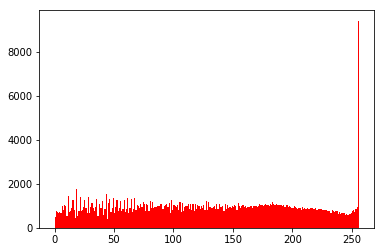

In [11]:

img_dark = cv2.imread('shiguanzhang.png')
src = cv2.resize(img_dark, (int(img_dark.shape[1] * 0.5), int(img_dark.shape[0] * 0.5)))
cv2.imshow("src", src)

img_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
#绘制灰度直方图
plt.hist(img_output.flatten(), 256, [0, 256], color = 'r' )
cv2.imshow('yuv_hist', img_output)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

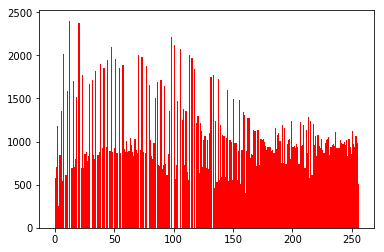

In [4]:
img_dark = cv2.imread('shiguanzhang.png')
src = cv2.resize(img_dark, (int(img_dark.shape[1] * 0.5), int(img_dark.shape[0] * 0.5)))
cv2.imshow("src", src)
#绘制灰度直方图


src[:,:,0] = cv2.equalizeHist(src[:,:,0]) 
src[:,:,1] = cv2.equalizeHist(src[:,:,1]) 
src[:,:,2] = cv2.equalizeHist(src[:,:,2]) 

cv2.imshow('after merge', src)
plt.hist(src.flatten(), 256, [0, 256], color = 'r' )
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

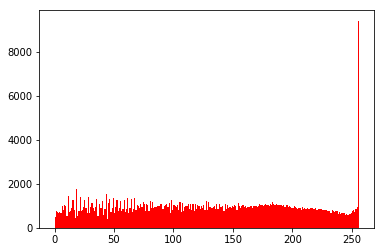

In [3]:
img_dark = cv2.resize(img_dark, (int(img_dark.shape[1]*0.5), int(img_dark.shape[0]*0.5)))

img_yuv = cv2.cvtColor(img_dark, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度
cv2.imshow('Color input image', img_dark)
cv2.imshow('Histogram equalized', img_output)
plt.hist(img_output.flatten(), 256, [0, 256], color = 'r')
key = cv2.waitKey(0)

In [16]:
#rotation
M = cv2.getRotationMatrix2D((src.shape[1]/2, src.shape[0]/2), 30,1)
img_rotate = cv2.warpAffine(src, M, (src.shape[1], src.shape[0]))
cv2.imshow('rotation', img_rotate)
key = cv2.waitKey(0)

In [5]:
M = cv2.getRotationMatrix2D((src.shape[1] / 2, src.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(src, M, (src.shape[1], src.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(src, M, (src.shape[1], src.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[  0.8660254    0.5        -28.16085212]
 [ -0.5          0.8660254  109.90226909]]
[[  0.8660254    0.5        -28.16085212]
 [ -0.5          0.8660254  109.90226909]]


In [17]:
rows, cols, ch = src.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(src, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [14]:
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(src, src.shape[0], src.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [25]:
#镜像尝试
rows, cols, chs = src.shape
#M = [[-1, 0, 0], [0, 1, 0], [cols, 0, 1]]
#M = np.array(M)
M = cv2.getRotationMatrix2D((src.shape[1] / 2, src.shape[0] / 2), 30, 1) # center, angle, scale
print(M)
img_rotate = cv2.warpAffine(src, M, (src.shape[1], src.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)



[[  0.8660254    0.5        -28.16085212]
 [ -0.5          0.8660254  109.90226909]]
[[  0.8660254    0.5        -28.16085212]
 [ -0.5          0.8660254  109.90226909]]


In [19]:
M = [[-1, 0, 0], [0, 1, 0], [22, 0, 1]]

In [21]:
M = np.array(M)
M[M > 1] = 99
print (M)

[[-1  0  0]
 [ 0  1  0]
 [99  0  1]]


In [3]:
import cv2
import math
import numpy as np

class Img:
    def __init__(self,image,rows,cols,center=[0,0]):
        self.src=image #原始图像
        self.rows=rows #原始图像的行
        self.cols=cols #原始图像的列
        self.center=center #旋转中心，默认是[0,0]

    def Move(self,delta_x,delta_y):      #平移
        #delta_x>0左移，delta_x<0右移
        #delta_y>0上移，delta_y<0下移
        self.transform=np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])

    def Zoom(self,factor):               #缩放
        #factor>1表示缩小；factor<1表示放大
        self.transform=np.array([[factor,0,0],[0,factor,0],[0,0,1]])

    def Horizontal(self):                #水平镜像
        self.transform=np.array([[1,0,0],[0,-1,self.cols-1],[0,0,1]])

    def Vertically(self):                #垂直镜像
        self.transform=np.array([[-1,0,self.rows-1],[0,1,0],[0,0,1]])

    def Rotate(self,beta):               #旋转
        #beta>0表示逆时针旋转；beta<0表示顺时针旋转
        self.transform=np.array([[math.cos(beta),-math.sin(beta),0],
                                 [math.sin(beta), math.cos(beta),0],
                                 [    0,              0,         1]])

    def Process(self):
        self.dst=np.zeros((self.rows,self.cols),dtype=np.uint8)
        for i in range(self.rows):
            for j in range(self.cols):
                src_pos=np.array([i-self.center[0],j-self.center[1],1])
                [x,y,z]=np.dot(self.transform,src_pos)
                x=int(x)+self.center[0]
                y=int(y)+self.center[1]

                if x>=self.rows or y>=self.cols or x<0 or y<0:
                    self.dst[i][j]=255
                else:
                    self.dst[i][j]=self.src[x][y]

if __name__=='__main__':
    src=cv2.imread('cat1.jpg',0)
    rows = src.shape[0]
    cols = src.shape[1]
    cv2.imshow('src', src)

    img=Img(src,rows,cols,[248,231])
    img.Vertically(src) #镜像
    img.Process(src)
    '''
    img.Rotate(-math.radians(180)) #旋转
    img.Process()
    img.Move(-50,-50) #平移
    img.Process()
    img.Zoom(0.5) #缩放
    img.Process()
    '''
    cv2.imshow('dst', img.dst)
    cv2.waitKey(0)


TypeError: Vertically() takes 1 positional argument but 2 were given

In [ ]:
img = cv2.imread('cat1.jpg')
img_hor ize = cv2.flip(img,1)
cv2.imshow('ss', img_horize)
cv2.imshow('src', img)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()